<a href="https://colab.research.google.com/github/MashrafeeAryan/November-11-2024-Handwritten-Digits-with-Linear-models/blob/main/November_11_2024_Handwritten_Digits_with_Linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch.nn as nn
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim

In [2]:
#The images in the MNIST dataset are in PIL (Python Image Library form).
#So we need to change it to tensor for it to work with PyTorch neural networks
transforms = transforms.Compose([transforms.ToTensor()])
train_data = datasets.MNIST(root="data", train=True, download = True, transform=transforms)
test_data = datasets.MNIST(root="data", train=False, download=True, transform = transforms)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.57MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 136kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.28MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.46MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
#Dataloaders to divide the data into batches. Batches are efficent
#We are sending batches of images rather than thousands of images together through the network
train_dataloader = DataLoader(dataset= train_data, batch_size = 64, shuffle=True)
test_dataloader = DataLoader(dataset= test_data, batch_size = 64, shuffle=False)

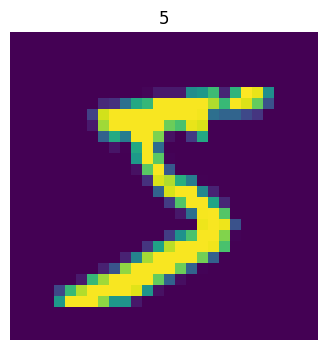

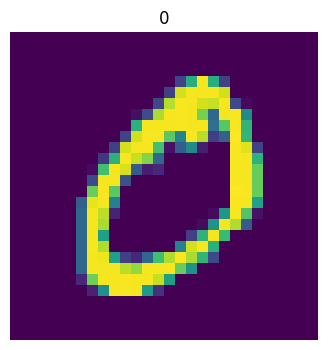

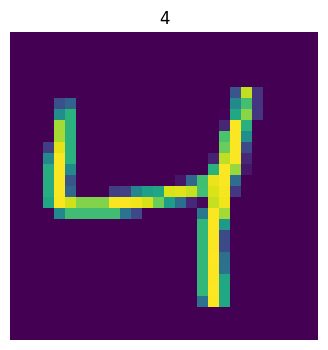

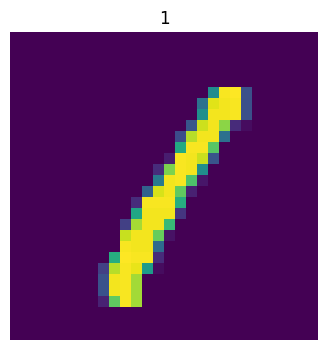

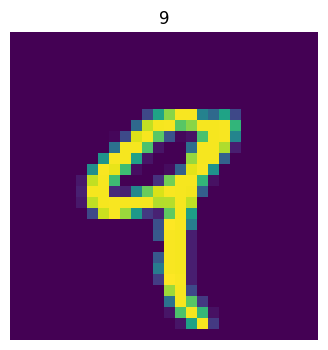

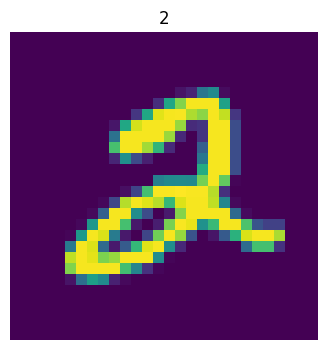

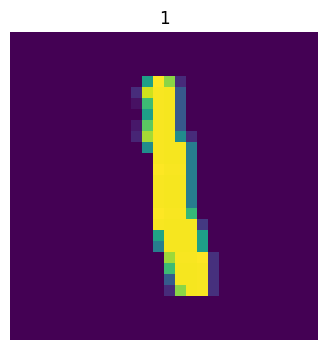

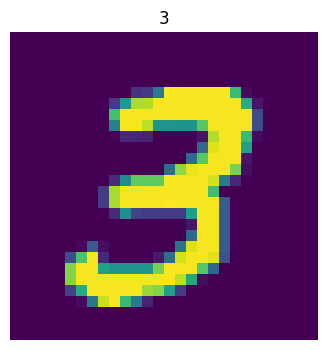

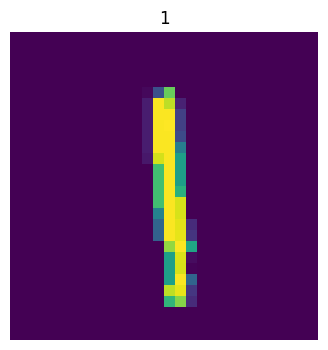

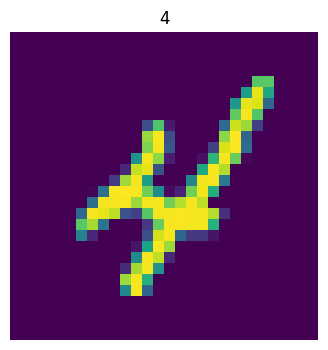

In [4]:
torch.manual_seed(42)
for i in range(10):
  plt.figure(figsize=(4,4))
  image, label = train_data[i]
  plt.imshow(image.squeeze())
  plt.title(label)
  plt.axis(False)


In [5]:
class Linear(nn.Module):
  def __init__(self):
    #By calling super().__init__(), you inherit the properties and methods of torch.nn.Module, which is essential for PyTorch to treat your class as a neural network model.
    super().__init__()
    self.layer_1 = nn.Linear(784, 30)
    self.layer_2 = nn.Linear(30, 10)

  def forward(self, x):
    x = x.view(-1, 784)
    x = F.relu(self.layer_1(x))
    x = self.layer_2(x)
    return x



In [6]:
model_1 = Linear()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_1.parameters(), lr=0.01)

In [7]:
len(train_dataloader)

938

In [8]:
epochs = 5
for epoch in range(epochs):
  loss_amount = 0 # Resets for each epoch
  test_loss = 0
  model_1.train()
  for images, labels in train_dataloader:
    #Forward pass
    results = model_1(images)

    #Calculate the loss
    loss = loss_func(results, labels)

    #Optimzer zero grad
    optimizer.zero_grad()

    #Loss Backwards
    loss.backward()

    #Optimizer step
    optimizer.step()

    #Store the loss result
    loss_amount += loss.item() #Just the scalar value


  model_1.eval()
  with torch.inference_mode():
    for test_images, test_labels in test_dataloader:
      test_results = model_1(test_images)
      s_loss = loss_func(test_results, test_labels)
      test_loss += s_loss.item()

  print(f"Epoch: {epoch+1}/{epochs} | Train_Loss: {loss_amount/len(train_dataloader)} | Test_Loss: {test_loss/len(test_dataloader)}")





Epoch: 1/5 | Train_Loss: 1.2663455187384762 | Test_Loss: 0.6017508979435939
Epoch: 2/5 | Train_Loss: 0.5074983334172763 | Test_Loss: 0.41580234449000875
Epoch: 3/5 | Train_Loss: 0.4043719715464598 | Test_Loss: 0.360294250332436
Epoch: 4/5 | Train_Loss: 0.3629341905813481 | Test_Loss: 0.3338089765874064
Epoch: 5/5 | Train_Loss: 0.33886966671643737 | Test_Loss: 0.3154903029204364


7


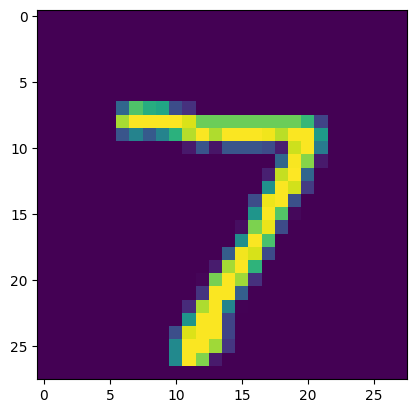

In [9]:
a, b = test_data[0]
plt.imshow(a.squeeze())
predictions = torch.argmax(model_1(a), dim=1).item()
print(predictions)

In [10]:
# I wrote this to figure out how many accurate images we are getting
accurate_images = 0
inaccurate_images = 0
for i in range(len(test_data)):
  a, b = test_data[i]
  predictions = torch.argmax(model_1(a), dim=1).item()
  if predictions == b:
    accurate_images+=1
  else:
    inaccurate_images+=1
print(f"Accurate Images: {accurate_images} | Inaccuate Images: {inaccurate_images}")

Accurate Images: 9107 | Inaccuate Images: 893


In [11]:
torch.save(model_1.state_dict(), 'model_1.pth')

In [12]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [13]:
!git remote add origin https://github.com/MashrafeeAryan/November-11-2024-Handwritten-Digits-with-Linear-models.git

In [14]:
!git add model_1.pth


In [15]:
!git commit -m "Add trained PyTorch model"


Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@60961e6ada57.(none)')


In [22]:
!git push origin main


error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/MashrafeeAryan/November-11-2024-Handwritten-Digits-with-Linear-models.git'
